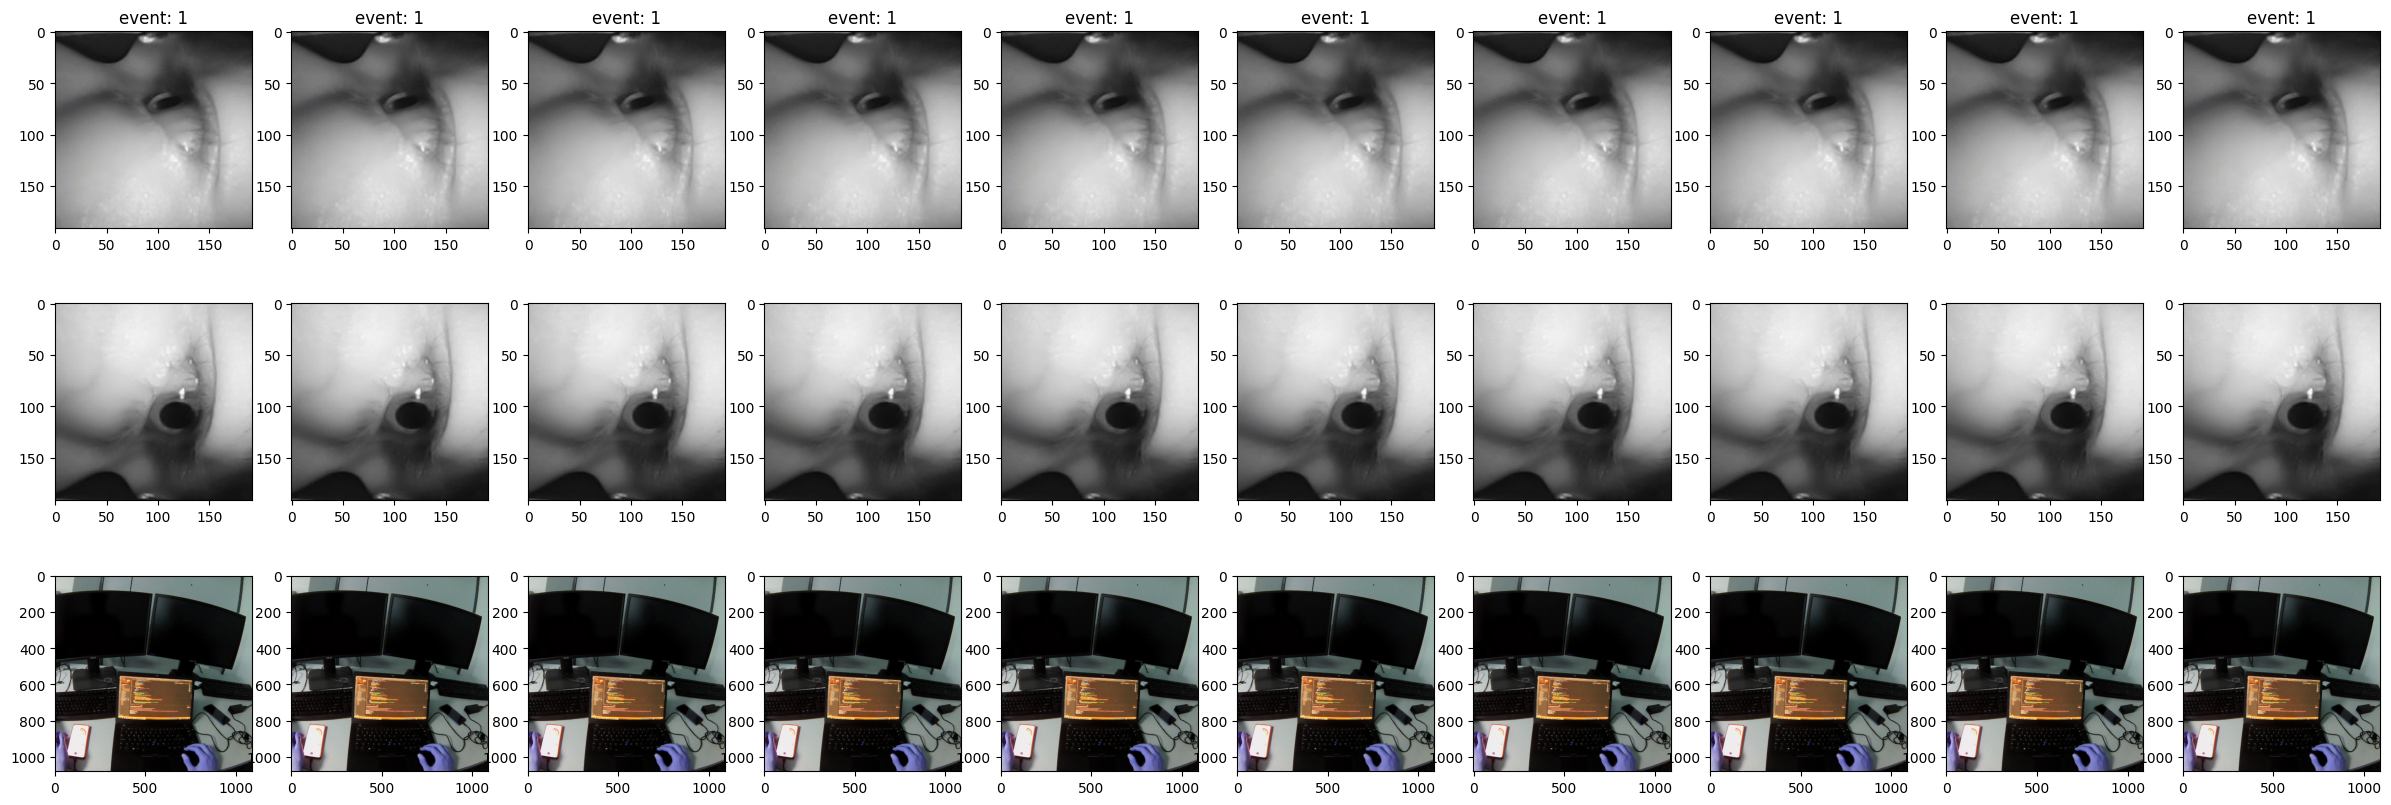

In [4]:
from matplotlib import pyplot as plt
from constants import *
import pandas as pd
import cv2
import numpy as np
import os
# recording: 9480f94c-6052-4d26-86b7-f2383bf34de3
#plot 3 images in a row from each camera, using the gaze with frames and events csv file and take the pictures from the frames folder respectively

#return images from the frames folder
def plot_images_from_gaze(recording_id, gaze_index=3000):
    recording_folder = recordings_folder + recording_id + "/"
    gaze_df = pd.read_csv(recording_folder + "gaze_with_frames_and_events.csv")
    #get indices of the gaze line
    left_eye_frame = gaze_df['left_eye_idx'][gaze_index]
    right_eye_frame = gaze_df['right_eye_idx'][gaze_index]
    world_frame = gaze_df['world_idx'][gaze_index]
    #get the images from the frames folder
    left_eye_image = cv2.imread(recording_folder + camera_folders[0]  + '/' + str(left_eye_frame) + ".png")
    right_eye_image = cv2.imread(recording_folder + camera_folders[1]  + '/' + str(right_eye_frame) + ".png")
    world_image = cv2.imread(recording_folder + camera_folders[2]  + '/' + str(world_frame) + ".png")

    return left_eye_image, right_eye_image, world_image

def plot_10_images_from_gaze(recording_id, first_gaze_index=3000):
    fig, axs = plt.subplots(3, 10, figsize=(30, 10))
    for i in range(10):
        gaze_df = pd.read_csv("recordings/" + recording_id + "/gaze_with_frames_and_events.csv")
        left_eye_image, right_eye_image, world_image = plot_images_from_gaze(recording_id, first_gaze_index + i)
        events = gaze_df['event_idx'][first_gaze_index + i]
        axs[0, i].imshow(left_eye_image)
        axs[1, i].imshow(right_eye_image)
        axs[2, i].imshow(world_image)
        #add event_id to the image
        axs[0, i].set_title("event: " + str(events))
    plt.show()
        
plot_10_images_from_gaze("4acb92b5-4af2-4b56-962c-9c7f7dd6d670", 3000)

In [33]:
#read 82e52db9-1cac-495d-99dd-bebb51c393a0\PI left v1_sae_log_1.bin.bin
from constants import *
import numpy as np
def read_camera_logs(recording_id):
    recording_folder = "recordings/" + recording_id + "/"
    camera_logs = []
    camera_names = ["PI left v1", "PI right v1", "PI world v1"]
    for camera in camera_names[:2]:
        camera_logs.append(np.fromfile(recording_folder + camera + "_sae_log_1.bin.bin", dtype=np.uint8))
    return camera_logs

this matches with the .time files

03-26 15:06:19.895 29534 29534 E RecWatchdogService: Start rec uri file:///storage/emulated/0/Documents/Pupil%20Invisible/9ae5e987-5235-486f-8552-427014bbedcd/82e52db9-1cac-495d-99dd-bebb51c393a0/PI%20right%20v1-raw-noup%20ps1.mjpeg sensor PI right v1-raw-noup

In [7]:
from matplotlib import pyplot as plt
from constants import *
import pandas as pd
import cv2
import numpy as np
#calculate the mean of the difference between each following timestamp of world
mean_world = np.mean(np.diff(world_ts))
#convert to fps
fps_world = 1/(mean_world*10**-6)
print(fps_world)


0.02271951160019235


In [49]:
import time
tsone = world_ts[0] - world_ts[1]
#convert nanoseconds to human readable time with milliseconds
print(world_ts[0])
print(world_ts[1]- world_ts[0])

1679835979898598083
1679835979948855083


C:\Users\mathi\AppData\Local\Temp\ipykernel_12012\1250327226.py:2: RuntimeWarning: overflow encountered in scalar subtract
  tsone = world_ts[0] - world_ts[1]


In [8]:
recording_id = "82e52db9-1cac-495d-99dd-bebb51c393a0"
recording_folder = "recordings/" + recording_id + "/"

events_timestamps = decode_timestamp(recording_folder + "event.time")
events_df = pd.read_csv(recording_folder + "events.csv")

events_timestamps[0] - events_df['timestamp [ns]'][0]

0.0